In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base2023 = pd.read_csv("obitos-2021.csv")
base2023

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,11
1,AC,OUTRAS,DOMICILIO,< 9,M,21
2,AC,OUTRAS,HOSPITAL,< 9,F,67
3,AC,OUTRAS,HOSPITAL,< 9,I,4
4,AC,OUTRAS,HOSPITAL,< 9,M,60
...,...,...,...,...,...,...
15669,TO,PNEUMONIA,HOSPITAL,N/I,F,5
15670,TO,PNEUMONIA,HOSPITAL,N/I,I,2
15671,TO,PNEUMONIA,HOSPITAL,N/I,M,2
15672,TO,SEPTICEMIA,HOSPITAL,N/I,F,2


In [3]:
print(base2023.describe())

              total
count  15674.000000
mean     107.463953
std      508.837844
min        1.000000
25%        2.000000
50%        6.000000
75%       36.000000
max    14166.000000


In [4]:
print(base2023.isnull().sum())

uf              0
tipo_doenca     0
local_obito     0
faixa_etaria    0
sexo            3
total           0
dtype: int64


In [5]:
# Filtrar os dados para obter apenas os registros de mortes por COVID
covid_data = base2023[base2023['tipo_doenca'] == 'COVID']

# Agrupar os dados por estado e calcular a soma total de mortes por estado
mortes_por_estado = covid_data.groupby('uf')['total'].sum()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_estado.sum()
print(f"Soma total de mortes por COVID: {soma_total_mortes}")

# Calcular a média de mortes por estado
media_mortes_por_estado = soma_total_mortes / len(mortes_por_estado)
print(f"Média de mortes por estado: {media_mortes_por_estado:.2f}")

# Calcular a mediana de mortes por estado
mediana_mortes_por_estado = mortes_por_estado.median()
print(f"Mediana de mortes por estado: {mediana_mortes_por_estado}")

print(mortes_por_estado)

Soma total de mortes por COVID: 413702
Média de mortes por estado: 15322.30
Mediana de mortes por estado: 7172.0
uf
AC      1296
AL      3411
AM      6850
AP       953
BA     15705
CE     14294
DF      6027
ES      8205
GO     17285
MA      4905
MG     45224
MS      7172
MT      8389
PA      7390
PB      6044
PE     12033
PI      4062
PR     32975
RJ     40623
RN      4593
RO      4390
RR      1133
RS     27343
SC     14611
SE      3313
SP    113214
TO      2262
Name: total, dtype: int64


In [36]:
# Remover registros com valores nulos na variável 'sexo'
covid_data_clean = covid_data.dropna(subset=['sexo'])

# Agrupar os dados por estado (UF) e sexo, calculando a soma total de mortes
mortes_por_estado_sexo = covid_data_clean.groupby(['uf', 'sexo'])['total'].sum().unstack(fill_value=0)

# Calcular a média de mortes por sexo por UF
media_mortes_por_sexo = mortes_por_estado_sexo.mean()
print("Média de mortes por sexo por UF:")
print(media_mortes_por_sexo)

# Calcular a soma total de mortes por sexo
soma_total_mortes_sexo = mortes_por_estado_sexo.sum()
print("\nSoma total de mortes por sexo:")
print(soma_total_mortes_sexo)

# Calcular a soma total de mortes por COVID
soma_total_mortes = soma_total_mortes_sexo.sum()
print(f"\nSoma total de mortes por COVID: {soma_total_mortes}")

# Calcular o percentual de mortes por sexo em relação ao total
percentual_mortes_sexo = (soma_total_mortes_sexo / soma_total_mortes) * 100
print("\nPercentual de mortes por sexo em relação ao total:")
print(percentual_mortes_sexo)

Média de mortes por sexo por UF:
sexo
F    6816.962963
I       8.444444
M    8496.888889
dtype: float64

Soma total de mortes por sexo:
sexo
F    184058
I       228
M    229416
dtype: int64

Soma total de mortes por COVID: 413702

Percentual de mortes por sexo em relação ao total:
sexo
F    44.490479
I     0.055112
M    55.454409
dtype: float64


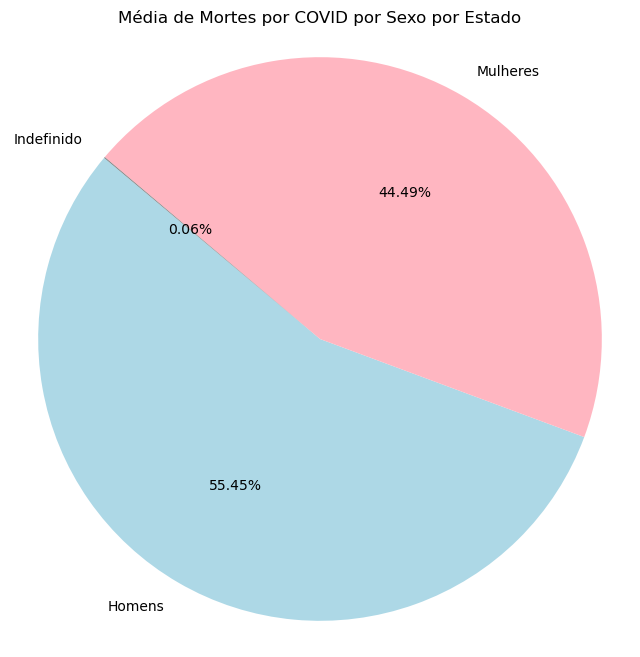

In [7]:
# Dados para o gráfico de sexo de cada obito
labels = ['Homens', 'Mulheres', 'Indefinido']
sizes = [media_mortes_por_sexo['M'], media_mortes_por_sexo['F'], media_mortes_por_sexo['I']]
colors = ['lightblue','lightpink','gray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Média de Mortes por COVID por Sexo por Estado')
plt.axis('equal')
plt.show()

In [8]:
# Agrupar os dados por faixa etária, calculando a soma total de mortes
mortes_por_faixa_etaria = covid_data.groupby('faixa_etaria')['total'].sum()

# Identificar a faixa etária com o maior número de óbitos
faixa_mais_obitos = mortes_por_faixa_etaria.idxmax()
total_obitos_faixa_mais_obitos = mortes_por_faixa_etaria.max()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_faixa_etaria.sum()

# Calcular a porcentagem da faixa etária com mais óbitos em relação ao total
percentual_faixa_mais_obitos = (total_obitos_faixa_mais_obitos / soma_total_mortes) * 100

print(f"A maior parte dos óbitos por COVID aconteceu na faixa etária de {faixa_mais_obitos}.")
print(f"Essa faixa representa {percentual_faixa_mais_obitos:.2f}% do total de óbitos por COVID no Brasil.")

A maior parte dos óbitos por COVID aconteceu na faixa etária de 70 - 79.
Essa faixa representa 23.63% do total de óbitos por COVID no Brasil.


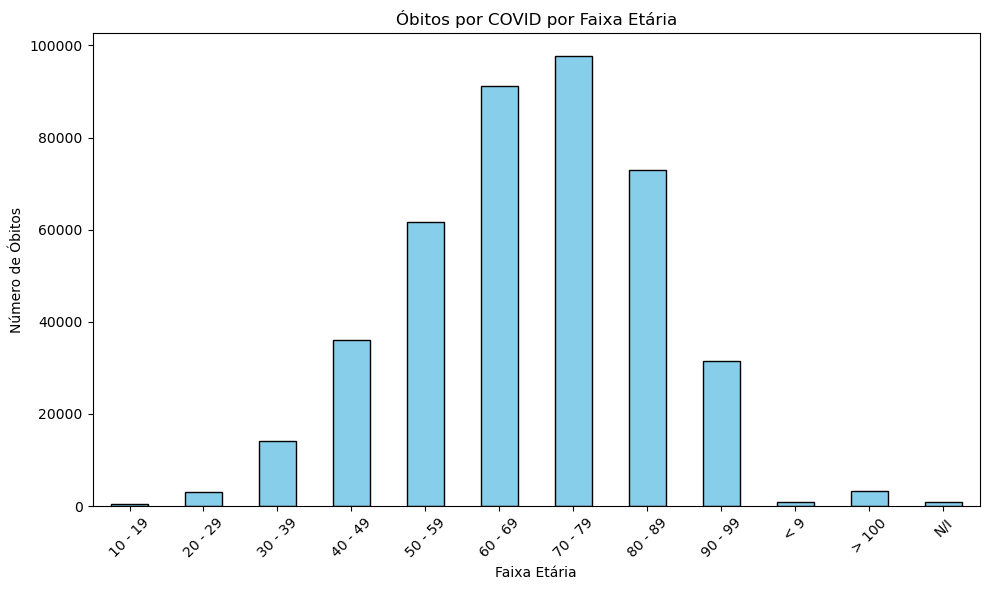

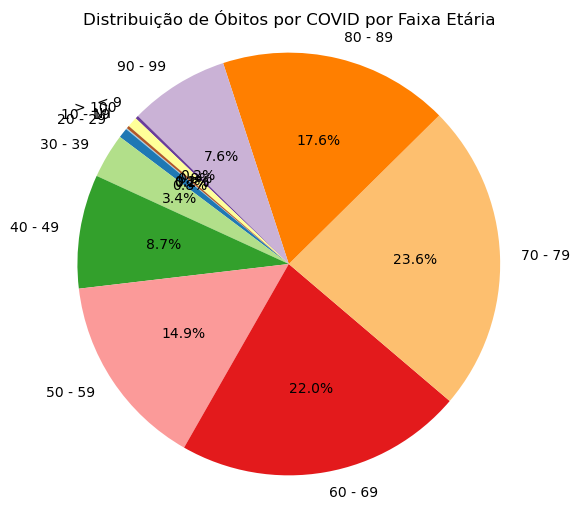

In [9]:
# Gráfico de barras das mortes por faixa etária
plt.figure(figsize=(10, 6))
mortes_por_faixa_etaria.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Óbitos por COVID por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pizza para a distribuição das mortes por faixa etária
plt.figure(figsize=(6, 6))
mortes_por_faixa_etaria.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(mortes_por_faixa_etaria))))
plt.title('Distribuição de Óbitos por COVID por Faixa Etária')
plt.ylabel('') 
plt.axis('equal')
plt.show()

In [41]:
# Calcular a porcentagem de óbitos de pessoas com 60 anos ou mais
porcentagem_idosos = mortes_por_faixa_etaria['60-79':].sum() / mortes_por_faixa_etaria.sum() * 100

print(f"Porcentagem de óbitos de idosos (60 anos ou mais): {porcentagem_idosos:.2f}%")

Porcentagem de óbitos de idosos (60 anos ou mais): 50.11%


In [11]:
# Definir locais considerados adequados
locais_adequados = ['HOSPITAL', 'POSTO_SAUDE', 'OUTROS_SERVICOS_SAUDE']

# Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
covid_data = covid_data.copy()

# Criar a nova coluna usando loc e uma função lambda
covid_data.loc[:, 'local_adequado'] = covid_data['local_obito'].apply(lambda x: 'Adequado' if x in locais_adequados else 'Inadequado')

# Agrupar os dados por local adequado/inadequado e calcular a soma total de mortes
mortes_por_local = covid_data.groupby('local_adequado')['total'].sum()

# Calcular a quantidade total de mortes por COVID
soma_total_mortes = mortes_por_local.sum()

# Calcular os valores específicos e percentuais para locais adequados, inadequados e desconhecidos
mortes_adequadas = mortes_por_local.get('Adequado', 0)
mortes_inadequadas = mortes_por_local.get('Inadequado', 0)
mortes_desconhecidas = soma_total_mortes - (mortes_adequadas + mortes_inadequadas)

percentual_adequadas = (mortes_adequadas / soma_total_mortes) * 100
percentual_inadequadas = (mortes_inadequadas / soma_total_mortes) * 100
percentual_desconhecidas = (mortes_desconhecidas / soma_total_mortes) * 100
print(f"Da quantidade total de {soma_total_mortes} óbitos por COVID, {mortes_adequadas} ocorreram em locais adequados, o que representa aproximadamente {percentual_adequadas:.2f}% da quantidade total.")
print(f"Sendo assim, outros {mortes_inadequadas} óbitos ocorreram em locais inadequados, representando cerca de {percentual_inadequadas:.2f}% do total.")
print(f"E outros {mortes_desconhecidas} não há informações sobre o local dos óbitos, sendo esses {percentual_desconhecidas:.2f}% dos óbitos.")

Da quantidade total de 413702 óbitos por COVID, 393556 ocorreram em locais adequados, o que representa aproximadamente 95.13% da quantidade total.
Sendo assim, outros 20146 óbitos ocorreram em locais inadequados, representando cerca de 4.87% do total.
E outros 0 não há informações sobre o local dos óbitos, sendo esses 0.00% dos óbitos.


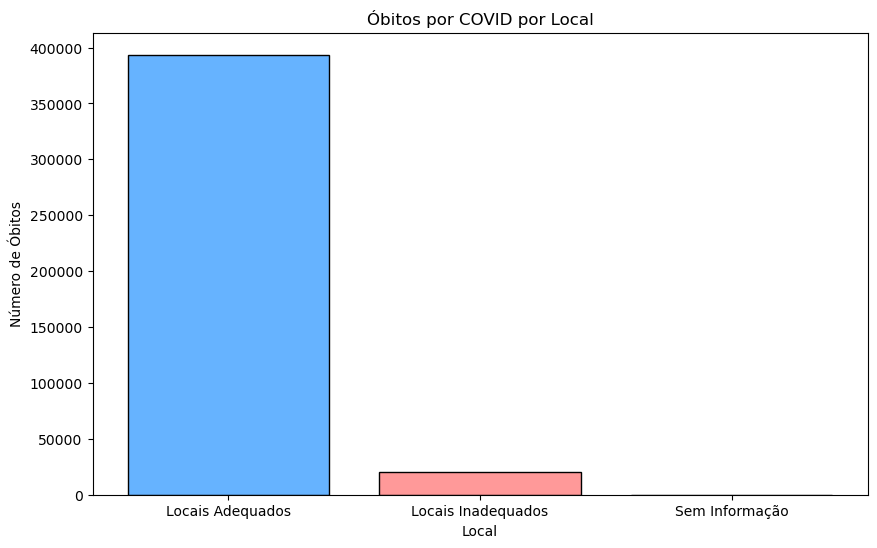

In [12]:
# Criando grafico relativo a local dos obitos
labels = ['Locais Adequados', 'Locais Inadequados', 'Sem Informação']
sizes = [mortes_adequadas, mortes_inadequadas, mortes_desconhecidas]
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Gráfico de barras dos óbitos por local adequado/inadequado
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.title('Óbitos por COVID por Local')
plt.xlabel('Local')
plt.ylabel('Número de Óbitos')
plt.show()

In [13]:
# Calcular o desvio padrão das mortes por COVID por estado
desvio_padrao = mortes_por_estado.std()
print(f"Desvio padrão do número de mortes por COVID por estado: {desvio_padrao:.2f}")

# Calcular a média das mortes por COVID por estado
media_mortes_por_estado = mortes_por_estado.mean()
print(f"Média do número de mortes por COVID por estado: {media_mortes_por_estado:.2f}")

# Calcular o coeficiente de variação (CV)
coeficiente_variacao = (desvio_padrao / media_mortes_por_estado) * 100
print(f"Coeficiente de variação (CV): {coeficiente_variacao:.2f}%")

Desvio padrão do número de mortes por COVID por estado: 22865.02
Média do número de mortes por COVID por estado: 15322.30
Coeficiente de variação (CV): 149.23%


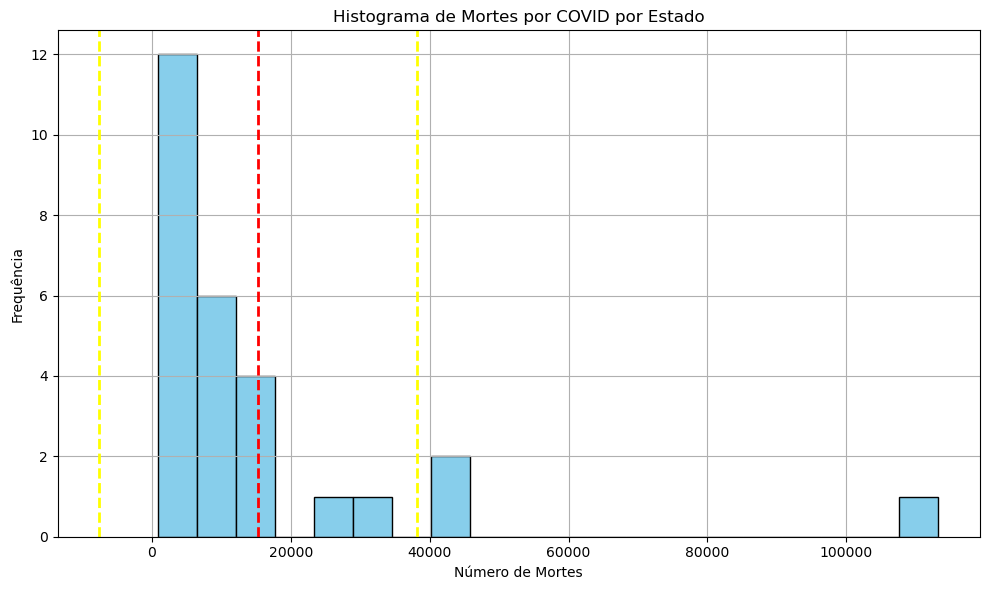

In [14]:
# Criar o histograma
plt.figure(figsize=(10, 6))
mortes_por_estado.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Número de Mortes")
plt.ylabel("Frequência")
plt.title("Histograma de Mortes por COVID por Estado")
plt.axvline(x=media_mortes_por_estado, color="red", linestyle="dashed", linewidth=2, label=f"Média: {media_mortes_por_estado:.2f}")
plt.axvline(x=media_mortes_por_estado + desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média + Desvio Padrão: {(media_mortes_por_estado + desvio_padrao):.2f}")
plt.axvline(x=media_mortes_por_estado - desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média - Desvio Padrão: {(media_mortes_por_estado - desvio_padrao):.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

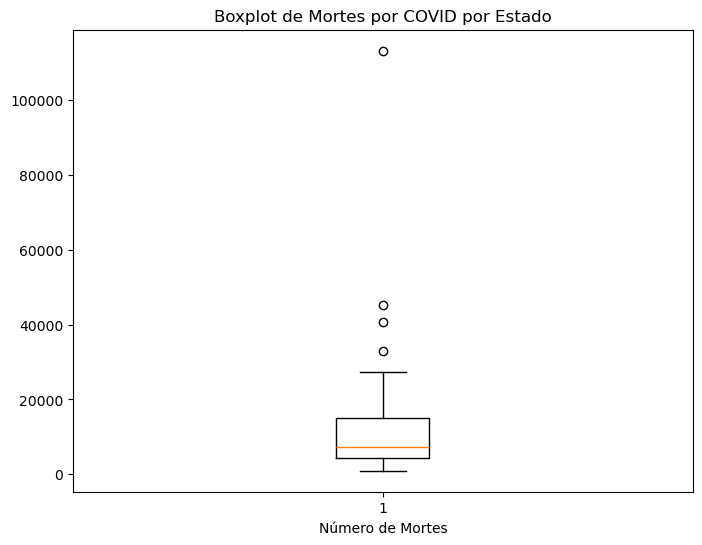

In [15]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(mortes_por_estado)

plt.xlabel("Número de Mortes")
plt.title("Boxplot de Mortes por COVID por Estado")
plt.show()

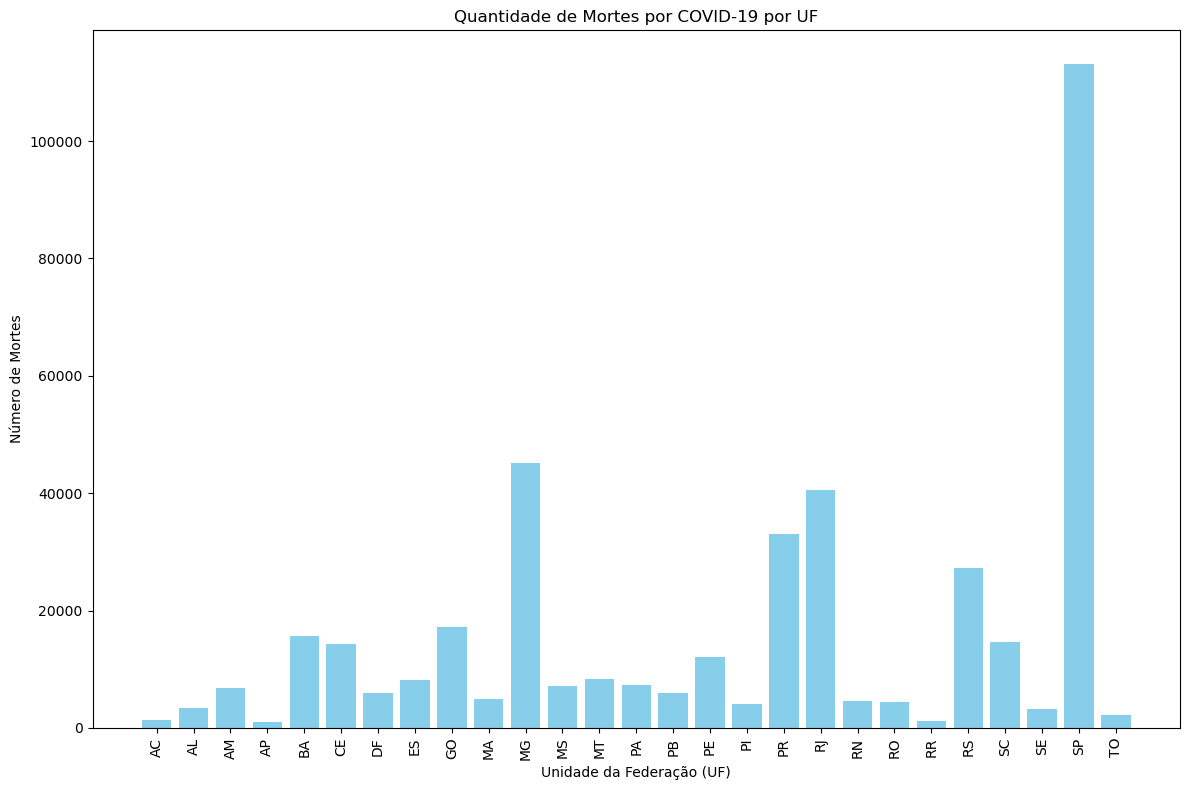

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(mortes_por_estado.index, mortes_por_estado.values, color='skyblue')

plt.xlabel('Unidade da Federação (UF)')
plt.ylabel('Número de Mortes')
plt.title('Quantidade de Mortes por COVID-19 por UF')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()